# Python Visualization

by: Oleg.E.Krivosheev@gmail.com

Introduction to Python and Pandas data manipulation. Data exploration and transformation.
Basic keywords: **python**, **pandas**, **seaborn**, **visualization**, **matplotlib**

First, visualization in Jupyter notebook start with *magic* command. IPython and Jupyter were designed to work seamlessly with **matplotlib** plotting library, and any libraries built on top of **matplotlib**. Before do any plotting command, you have to set up your **matplotlib** backend. This is done by executing `%matplotlib` command. But! This will not `import` anything and won't execute any `Python` command. `%matplotlib` without any arguments will show current default backend.

Inline backed means graphs would be inlined into output cell right below input cell with some graphics related commands

In [1]:
%matplotlib inline

Notebook backend means there could be an interactive graphs embedded into notebook

In [2]:
%matplotlib notebook

`%matplotlib` without any arguments will show current default backend.

In [3]:
%matplotlib

Using matplotlib backend: nbAgg


Potential backends to play with are `%matplotlib qt` or `%matplotlib gtk`

# Import packages

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import csv

sns.set_context("paper")

## Introduction

The main topic is data manipulation with Pandas, for example function application, groupby, aggregation and multi-indexes. All along I'll mention handy tricks that you can use for various tasks and demonstrate how we can plot results in different ways using [Seaborn](http://seaborn.pydata.org/) (based on matplotlib). Given the data format, special focus is put on time-series data manipulation.

# Plotting with matplotlib

First, several examples how to plot with **matplotlib**. Note, that there is a difference you get from `%matplotlib notebook` vs `%matplotlib inline` - integractive buttons for zoom, pan, back, save etc. If you're running `%matplotlib notebook`, you'd either have to call it before each plot, or explicitely make figure.

<IPython.core.display.Javascript object>


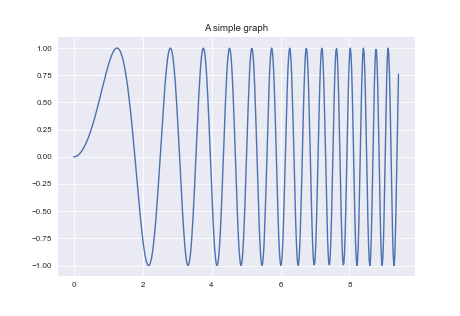

In [5]:
plt.figure() # do not remove! separate figure per cell
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple graph')
plt.show()

<IPython.core.display.Javascript object>


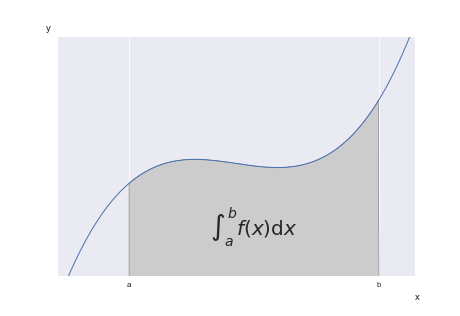

In [6]:
# %load integral.py
# implement the example graphs/integral from pyx

from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

plt.figure()
ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
plt.show()


Plotting histograms is quite easy as well. Start with some randomly generated points and bin them into histogram

<IPython.core.display.Javascript object>


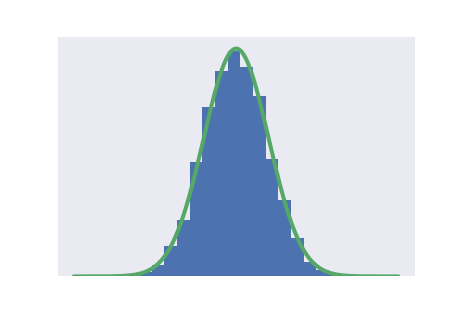

In [7]:
random_state = np.random.RandomState(19680801)
X = random_state.randn(10000)

fig, ax = plt.subplots()
ax.hist(X, bins = 20, normed = True)
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Plotting scatter plot was never being easier

<IPython.core.display.Javascript object>


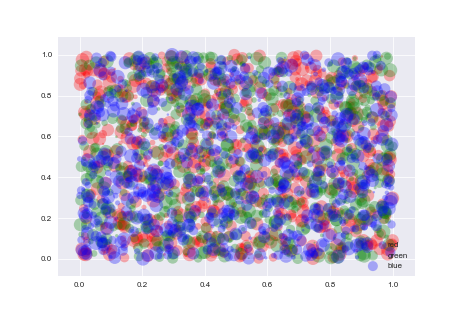

In [8]:
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = rand(2, n)
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Animated example

<IPython.core.display.Javascript object>


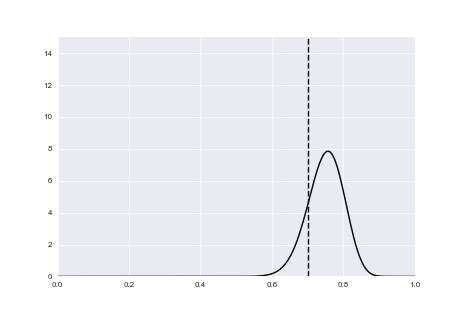

In [10]:
import scipy.stats as ss
from matplotlib.animation import FuncAnimation

class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                     interval=100, blit=True)
plt.show()

There are lots of way to make statistics related graphs. Lets start with box plot and violin plot.

<IPython.core.display.Javascript object>


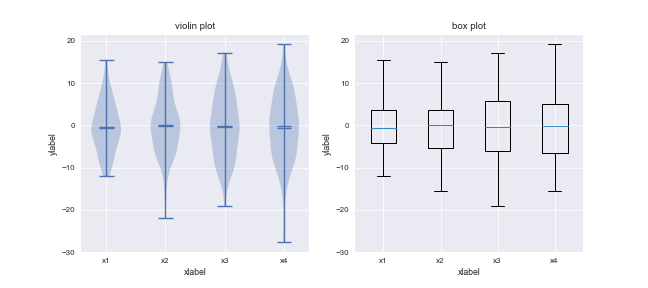

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=True,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

One could draw color maps as well

<IPython.core.display.Javascript object>


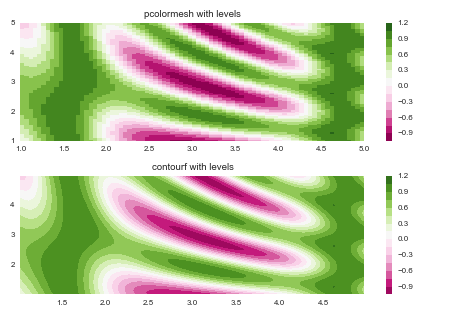

In [12]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

Pie chart plots, of course

<IPython.core.display.Javascript object>


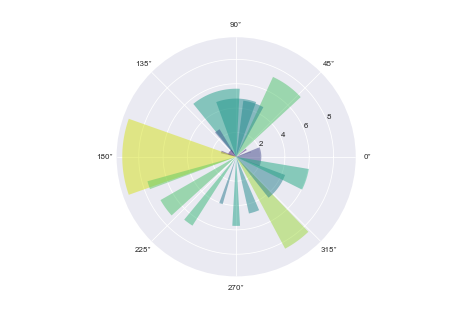

In [13]:
# Compute pie slices

plt.figure()

N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

One could use a lot of different styles, like ggplot2 inspired one

<IPython.core.display.Javascript object>


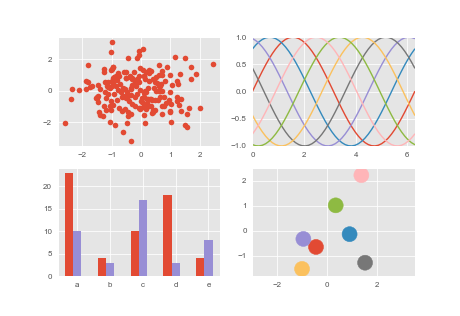

In [14]:
plt.style.use('ggplot')

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

# Seaborn statistical graphics

Seaborn is a statistical graphics package built on top of **matplotlib**. It provides higher level graphics capabilities taylored to the statistics and data manipulation.

## Load Data

First, load flights information into data frame - just read CSV.

In [15]:
hflights = pd.read_csv("hflights.csv")
hflights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


Here one can see the data frame base statistical values.

In [16]:
hflights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,227496.0,227496.000000,227496.000000,227496.000000,224591.000000,224430.000000,227496.000000,223874.000000,223874.000000,223874.000000,224591.000000,227496.000000,224430.000000,224549.000000,227496.000000,227496.000000
mean,2011.0,6.513662,15.737446,3.947691,1395.755614,1578.254106,1961.663141,129.323745,108.142335,7.094334,9.444951,787.783245,6.098855,15.091098,0.013068,0.002853
std,0.0,3.417676,8.782705,1.990272,448.322238,472.401715,1430.793403,59.285838,56.555231,30.708516,28.803615,453.680566,3.961069,7.740373,0.113568,0.053335
min,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000,11.000000,-70.000000,-33.000000,79.000000,1.000000,1.000000,0.000000,0.000000
25%,2011.0,4.000000,8.000000,2.000000,1021.000000,1215.000000,855.000000,77.000000,58.000000,-8.000000,-3.000000,376.000000,4.000000,10.000000,0.000000,0.000000
50%,2011.0,7.000000,16.000000,4.000000,1416.000000,1617.000000,1696.000000,128.000000,107.000000,0.000000,0.000000,809.000000,5.000000,14.000000,0.000000,0.000000
75%,2011.0,9.000000,23.000000,6.000000,1801.000000,1953.000000,2755.000000,165.000000,141.000000,11.000000,9.000000,1042.000000,7.000000,18.000000,0.000000,0.000000
max,2011.0,12.000000,31.000000,7.000000,2400.000000,2400.000000,7290.000000,575.000000,549.000000,978.000000,981.000000,3904.000000,165.000000,163.000000,1.000000,1.000000


In [17]:
hflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227496 entries, 0 to 227495
Data columns (total 21 columns):
Year                 227496 non-null int64
Month                227496 non-null int64
DayofMonth           227496 non-null int64
DayOfWeek            227496 non-null int64
DepTime              224591 non-null float64
ArrTime              224430 non-null float64
UniqueCarrier        227496 non-null object
FlightNum            227496 non-null int64
TailNum              226701 non-null object
ActualElapsedTime    223874 non-null float64
AirTime              223874 non-null float64
ArrDelay             223874 non-null float64
DepDelay             224591 non-null float64
Origin               227496 non-null object
Dest                 227496 non-null object
Distance             227496 non-null int64
TaxiIn               224430 non-null float64
TaxiOut              224549 non-null float64
Cancelled            227496 non-null int64
CancellationCode     2973 non-null object
Diverted  

Any operations on data in Pandas are either done over columns (row index/name fixed, column index is changing) or over rows (columns index is fixed, row index is changing). For that there is quite well-spread through API parameter called *axis*. To have better mnemonics I usually define two constants.

In [39]:
AXIS_ROW_OP = 0
AXIS_COL_OP = 1

## Delete dead column

In [41]:
# del hflights['Year'] # or, alternatively, drop column
hflights.drop(['Year'], axis = AXIS_COL_OP, inplace = True, errors = 'ignore')
hflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227496 entries, 0 to 227495
Data columns (total 20 columns):
Month                227496 non-null int64
DayofMonth           227496 non-null int64
DayOfWeek            227496 non-null int64
DepTime              224591 non-null float64
ArrTime              224430 non-null float64
UniqueCarrier        227496 non-null object
FlightNum            227496 non-null int64
TailNum              226701 non-null object
ActualElapsedTime    223874 non-null float64
AirTime              223874 non-null float64
ArrDelay             223874 non-null float64
DepDelay             224591 non-null float64
Origin               227496 non-null object
Dest                 227496 non-null object
Distance             227496 non-null int64
TaxiIn               224430 non-null float64
TaxiOut              224549 non-null float64
Cancelled            227496 non-null int64
CancellationCode     2973 non-null object
Diverted             227496 non-null int64
dtypes: fl

Now, check if we have any null values

In [48]:
q = hflights.isnull()
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227496 entries, 0 to 227495
Data columns (total 20 columns):
Month                227496 non-null bool
DayofMonth           227496 non-null bool
DayOfWeek            227496 non-null bool
DepTime              227496 non-null bool
ArrTime              227496 non-null bool
UniqueCarrier        227496 non-null bool
FlightNum            227496 non-null bool
TailNum              227496 non-null bool
ActualElapsedTime    227496 non-null bool
AirTime              227496 non-null bool
ArrDelay             227496 non-null bool
DepDelay             227496 non-null bool
Origin               227496 non-null bool
Dest                 227496 non-null bool
Distance             227496 non-null bool
TaxiIn               227496 non-null bool
TaxiOut              227496 non-null bool
Cancelled            227496 non-null bool
CancellationCode     227496 non-null bool
Diverted             227496 non-null bool
dtypes: bool(20)
memory usage: 4.3 MB


In [63]:
t = q.any()
print(type(t))
print(t)

<class 'pandas.core.series.Series'>
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
ArrTime               True
UniqueCarrier        False
FlightNum            False
TailNum               True
ActualElapsedTime     True
AirTime               True
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance             False
TaxiIn                True
TaxiOut               True
Cancelled            False
CancellationCode      True
Diverted             False
dtype: bool


In [68]:
l = len(hflights)
# print(l)
c = hflights.count()
# print(c)
print(l - c)

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                2905
ArrTime                3066
UniqueCarrier             0
FlightNum                 0
TailNum                 795
ActualElapsedTime      3622
AirTime                3622
ArrDelay               3622
DepDelay               2905
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 3066
TaxiOut                2947
Cancelled                 0
CancellationCode     224523
Diverted                  0
dtype: int64


In [77]:
iah = hflights['Origin'] != 'IAH'
hou = hflights['Origin'] != 'HOU'
print(iah.sum(), hou.sum(), iah.sum() + hou.sum())

52299 175197 227496


## Some Seaborn plotting

<IPython.core.display.Javascript object>


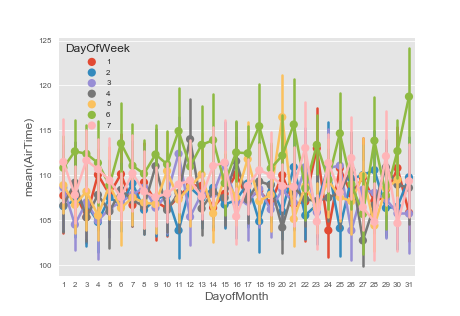

In [60]:
plt.figure()
sns.pointplot(x='DayofMonth', y='AirTime', data=hflights, hue='DayOfWeek')
sns.plt.show()

There are two airport in the dataset, so we could plot and see how they are different

<IPython.core.display.Javascript object>


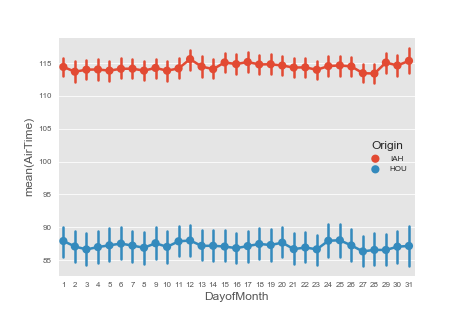

In [78]:
plt.figure()
sns.pointplot(x='DayofMonth', y='AirTime', data=hflights, hue='Origin')
sns.plt.show()

<IPython.core.display.Javascript object>


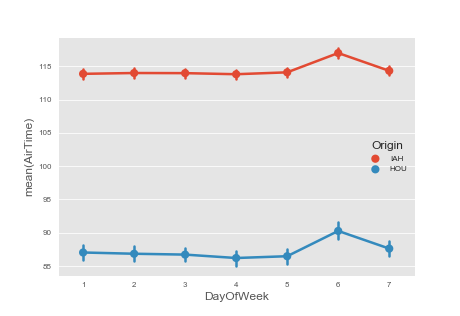

In [80]:
plt.figure()
sns.pointplot(x='DayOfWeek', y='AirTime', data=hflights, hue='Origin')
sns.plt.show()

<IPython.core.display.Javascript object>


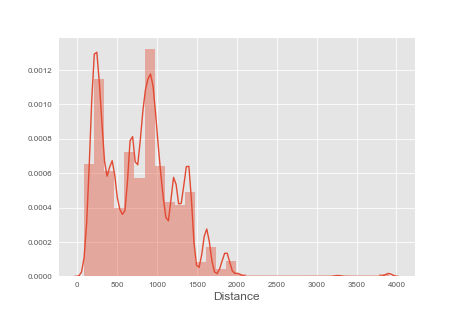

C:\Users\kriol\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [93]:
plt.figure()
sns.distplot(hflights["Distance"], bins=30)
sns.plt.show()

<IPython.core.display.Javascript object>


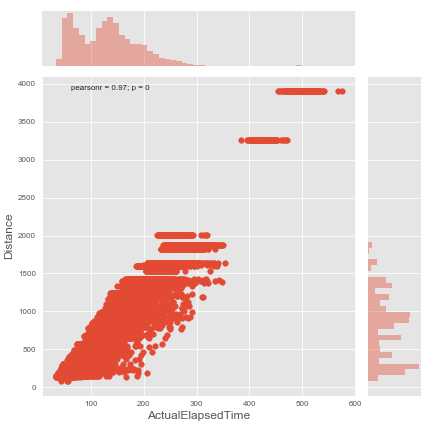

In [83]:
sns.jointplot(x="ActualElapsedTime", y="Distance", data=hflights)

### Using GroupBy

Groupby in Python/Pandas is the way to group series using key (or set of keys). Basically, it is the first of three step process:
- Splitting: split the data int ogroups based on some key, keys or other criteria
- Applying a function to each group independently (mean, sum, ...)
- Combining the results into a final data structure

In [112]:
carriers = hflights.groupby(by=["UniqueCarrier"], axis=AXIS_ROW_OP, as_index=False)
print(type(carriers))
print(carriers.groups)

<class 'pandas.core.groupby.DataFrameGroupBy'>
{'F9': Int64Index([  8357,   8358,   8359,   8360,   8361,   8362,   8363,   8364,
              8365,   8366,
            ...
            215022, 215023, 215024, 215025, 215026, 215027, 215028, 215029,
            215030, 215031],
           dtype='int64', length=838), 'WN': Int64Index([  7645,   7646,   7647,   7648,   7649,   7650,   7651,   7652,
              7653,   7654,
            ...
            227486, 227487, 227488, 227489, 227490, 227491, 227492, 227493,
            227494, 227495],
           dtype='int64', length=45343), 'EV': Int64Index([  8251,   8252,   8253,   8254,   8255,   8256,   8257,   8258,
              8259,   8260,
            ...
            214957, 214958, 214959, 214960, 214961, 214962, 214963, 214964,
            214965, 214966],
           dtype='int64', length=2204), 'B6': Int64Index([   304,    305,    306,    307,    308,    309,    310,    311,
               312,    313,
            ...
            2

We could look what's inside the groups - by pressing <TAB>

In [113]:
for name, c in carriers:
    print(name, c)

AA         Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0       2011      1           1          6   1400.0   1500.0            AA   
1       2011      1           2          7   1401.0   1501.0            AA   
2       2011      1           3          1   1352.0   1502.0            AA   
3       2011      1           4          2   1403.0   1513.0            AA   
4       2011      1           5          3   1405.0   1507.0            AA   
5       2011      1           6          4   1359.0   1503.0            AA   
6       2011      1           7          5   1359.0   1509.0            AA   
7       2011      1           8          6   1355.0   1454.0            AA   
8       2011      1           9          7   1443.0   1554.0            AA   
9       2011      1          10          1   1443.0   1553.0            AA   
10      2011      1          11          2   1429.0   1539.0            AA   
11      2011      1          12          3   1419.0   1515.0 

In [114]:
d = carriers.aggregate(np.mean).sort_values(by="Distance")
print(d)

   UniqueCarrier    Year     Month  DayofMonth  DayOfWeek      DepTime  \
0             AA  2011.0  6.546239   15.737361   3.969482  1229.524168   
13            XE  2011.0  6.365762   15.715439   3.961891  1412.498791   
12            WN  2011.0  6.532607   15.723044   3.844011  1386.275053   
8             MQ  2011.0  6.788296   15.749785   3.914372  1301.158105   
7             FL  2011.0  6.704067   15.823282   3.861150  1272.943841   
4             DL  2011.0  6.342295   15.861795   3.941310  1121.073049   
5             EV  2011.0  6.832123   15.706443   3.928766  1181.844892   
9             OO  2011.0  6.954673   15.948447   3.989664  1422.620670   
6             F9  2011.0  6.608592   15.885442   3.877088  1178.482593   
14            YV  2011.0  4.379747   16.278481   4.772152  1051.987179   
11            US  2011.0  6.907153   15.815287   3.993631  1153.791037   
3             CO  2011.0  6.491632   15.703307   3.990619  1435.984000   
10            UA  2011.0  6.869208   1

<IPython.core.display.Javascript object>


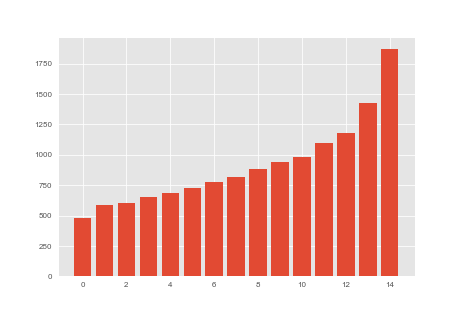

In [115]:
plt.figure()
plt.bar(range(d.shape[0]), d["Distance"])
plt.show()

# Web/Javascript based plotting

There are packagesthat uses Javascript libraries from Python to do Web/in browser plotting. Two most used ones are D3.js and Bokeh. Some examples how to use Bokeh

In [18]:
from bokeh.io import output_notebook
from bokeh.charts import Bar, show
from bokeh.layouts import row, column
from bokeh.models import BoxSelectTool, LassoSelectTool, Spacer
from bokeh.plotting import figure, show

In [26]:
N = 4000

x = np.random.random(size=N)*100
y = np.random.random(size=N)*100
r = np.random.random(size=N)*1.4

colors = ['#%02x%02x%02x' % (int(r), int(g), 150) for r, g in zip(np.floor(50 + 2*x), np.floor(50 + 2*y))]

output_notebook()

p = figure()
p.circle(x, y, radius=r, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

Loading BokehJS ...

In [116]:
output_notebook()
p = Bar(d, 'UniqueCarrier', values='Distance', title="Average airline route lengths")
show(p)

Loading BokehJS ...

# Plotting geospatial data

In [86]:
airports = pd.read_csv("airports.csv")
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 13 columns):
ident            46235 non-null object
type             46235 non-null object
name             46235 non-null object
latitude_deg     46235 non-null float64
longitude_deg    46235 non-null float64
elevation_ft     42603 non-null float64
continent        21174 non-null object
iso_country      46012 non-null object
iso_region       46235 non-null object
municipality     41329 non-null object
gps_code         39950 non-null object
iata_code        8410 non-null object
local_code       25931 non-null object
dtypes: float64(3), object(10)
memory usage: 4.6+ MB


# References